# **Recommendation System Project - Toba Tourism | Progress II**

Group 06 :

*   12S21016 - Kevin Unedo Samosir
*   12S21023 - Bintang Situmorang
*   12S21027 - Rebecca Sihombing



## Content-based Filtering - Model Pembanding | **K-Nearest Neighbors (KNN)**

### 1. Library Installation and Imports

In [1]:
!pip install Sastrawi
!pip install gdown

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


Kode di atas mengimpor beberapa pustaka dan modul yang digunakan untuk analisis teks, pemrosesan data, dan evaluasi model dalam rekomendasi berbasis konten. Pertama, `Sastrawi` diinstal untuk melakukan pengolahan bahasa alami, khususnya untuk menghapus kata-kata berhenti dalam bahasa Indonesia, dan `gdown` digunakan untuk mengunduh file dari Google Drive. Pustaka seperti `pandas` dan `numpy` digunakan untuk manipulasi data dan operasi numerik, sedangkan `matplotlib.pyplot` digunakan untuk visualisasi grafik. `TfidfVectorizer` dari `sklearn.feature_extraction.text` digunakan untuk mengonversi teks menjadi representasi numerik dengan pendekatan TF-IDF. `LabelEncoder` untuk mengonversi label kategorikal menjadi angka, dan `NearestNeighbors` serta `cosine_similarity` digunakan dalam rekomendasi berbasis kesamaan antara item. `train_test_split` dan `GridSearchCV` membantu dalam pembagian data dan pencarian hyperparameter model, sementara `make_scorer` digunakan untuk membuat fungsi penilaian khusus dalam evaluasi model. Terakhir, `StopWordRemoverFactory` dari `Sastrawi` digunakan untuk menghapus kata-kata tidak berarti dalam teks bahasa Indonesia.

### 2. Download and Load Dataset

In [2]:
# Download the dataset and load it into a pandas DataFrame
!gdown 15IvPCBnM0d7EdV7_j5urms9cCwnSa9v7

# Load dataset
file_path = 'Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)
data.head()

Downloading...
From: https://drive.google.com/uc?id=15IvPCBnM0d7EdV7_j5urms9cCwnSa9v7
To: /content/Tempat-Wisata-Toba-Preprocessing.csv
100% 8.99M/8.99M [00:00<00:00, 155MB/s]


,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k


Kode di atas mengunduh dataset dari Google Drive menggunakan perintah `gdown` yang diikuti dengan ID file yang spesifik, dalam hal ini file dengan ID `15IvPCBnM0d7EdV7_j5urms9cCwnSa9v7`. Setelah berhasil diunduh, file CSV yang berisi data tentang tempat wisata di Toba dimuat ke dalam objek `data` menggunakan `pd.read_csv(file_path)`. Fungsi `data.head()` digunakan untuk menampilkan lima baris pertama dari dataset tersebut, sehingga kita dapat memeriksa struktur dan isi data yang telah dimuat ke dalam pandas DataFrame.

In [3]:
# Display column names and dataset shape

print(data.columns)
print(data.shape)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'address', 'PlaceID',
       'Nama_tempat_wisata', 'Category', 'ReviewerId', 'Rating', 'Reviews'],
      dtype='object')
(43226, 9)


Kode di atas digunakan untuk menampilkan nama-nama kolom dalam dataset dan bentuk (shape) dari dataset yang telah dimuat sebelumnya.

- `data.columns` akan menampilkan daftar nama kolom dalam dataset `data`, sehingga kita bisa mengetahui struktur data (misalnya, apa saja fitur atau atribut yang ada dalam dataset).
- `data.shape` akan menampilkan bentuk dataset dalam format tuple `(baris, kolom)`, yang menunjukkan jumlah baris dan kolom dalam dataset. Ini memberikan gambaran umum mengenai ukuran dataset.

### 3. Check for Missing Values

In [4]:
# Check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    if missing_values.empty:
        print("No missing values in the DataFrame.")
    else:
        print("Missing values in each column:")
        print(missing_values)

check_missing_values(data)

Missing values in each column:
Reviews       21060
ReviewerId        1
Rating            1
dtype: int64


Kode di atas bertujuan untuk memeriksa nilai yang hilang (missing values) dalam dataset `data`. Fungsi `check_missing_values(df)` menghitung jumlah nilai hilang di setiap kolom menggunakan `isnull().sum()`, kemudian menampilkan kolom yang memiliki nilai hilang jika ada. Jika tidak ada kolom dengan nilai hilang, fungsi ini akan mencetak pesan bahwa tidak ada nilai hilang. Jika ada, fungsi ini akan menampilkan jumlah nilai hilang di masing-masing kolom yang terpengaruh.

Hasil pemeriksaan missing values menunjukkan bahwa kolom `Reviews` memiliki 21.060 nilai yang hilang, sementara kolom `ReviewerId` dan `Rating` masing-masing memiliki 1 nilai yang hilang. Ini mengindikasikan bahwa sebagian besar data pada kolom `Reviews` perlu ditangani, sementara kolom `ReviewerId` dan `Rating` hanya memiliki sedikit nilai hilang yang mungkin dapat diperbaiki dengan metode imputasi atau penghapusan baris terkait.

### 4. Data Cleaning and Merging Descriptions

In [5]:
# Clean data by removing unwanted columns and handle missing values
data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# Handle missing values
data['Reviews'] = data['Reviews'].fillna('')

# Combine Category and Reviews into a single description field
data['description'] = data['Category'] + ' ' + data['Reviews']

Pada tahap pembersihan data, kolom yang tidak diperlukan, seperti `Unnamed: 0.1` dan `Unnamed: 0`, dihapus untuk memudahkan analisis lebih lanjut. Kemudian, nilai hilang pada kolom `Reviews` diisi dengan string kosong (`''`), untuk memastikan tidak ada data yang hilang pada kolom tersebut yang dapat mengganggu pemrosesan. Selanjutnya, kolom `Category` dan `Reviews` digabungkan menjadi satu kolom baru bernama `description`, yang berisi informasi gabungan dari kategori tempat wisata dan ulasan pengguna. Langkah ini mempersiapkan data untuk analisis teks lebih lanjut, seperti ekstraksi fitur dan permodelan rekomendasi.

### 5. Encoding Categorical Columns

In [6]:
# Encode categorical columns using LabelEncoder
label_encoder_place = LabelEncoder()
data['PlaceID'] = label_encoder_place.fit_transform(data['Nama_tempat_wisata'])

label_encoder_reviewer = LabelEncoder()
data['ReviewerId'] = label_encoder_reviewer.fit_transform(data['ReviewerId'])

Pada tahap ini, kolom kategorikal dalam dataset diubah menjadi bentuk numerik menggunakan teknik *Label Encoding*. Kolom `Nama_tempat_wisata` dienkode menggunakan `LabelEncoder` untuk menghasilkan kolom baru `PlaceID`, yang berisi angka yang mewakili setiap tempat wisata unik. Hal yang sama dilakukan untuk kolom `ReviewerId`, yang juga dienkode menjadi bentuk numerik. Proses ini penting karena banyak algoritma pembelajaran mesin, termasuk model berbasis matriks dan rekomendasi, memerlukan data dalam format numerik untuk melakukan perhitungan dan pemrosesan lebih lanjut.

### 6. Text Cleaning (Stopword Removal)

In [7]:
# Remove stopwords from descriptions using Sastrawi
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()
data['cleaned_description'] = data['description'].apply(stopword_remover.remove)


Pada langkah ini, proses pembersihan teks dilakukan dengan menghapus kata-kata yang tidak bermakna (*stopwords*) dari kolom `description`. Stopwords adalah kata-kata umum seperti "dan", "di", "untuk", dan lainnya yang sering kali tidak memberikan informasi penting dalam analisis teks. Dengan menggunakan pustaka *Sastrawi*, yang merupakan pustaka pemrosesan bahasa Indonesia, stopwords dihapus dari teks dalam kolom `description`, dan hasilnya disimpan dalam kolom baru bernama `cleaned_description`. Pembersihan ini membantu meningkatkan kualitas data teks untuk analisis atau pemodelan selanjutnya, terutama dalam tugas seperti klasifikasi atau rekomendasi berbasis teks.

In [8]:
data.head()

,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews,description,cleaned_description
0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",51,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,10261,5.0,,Wisata Bahari,Wisata Bahari
1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",51,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,9698,5.0,bagus,Wisata Bahari bagus,Wisata Bahari bagus
2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",51,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,6433,5.0,,Wisata Bahari,Wisata Bahari
3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",51,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,10643,5.0,sangat menyenagkan,Wisata Bahari sangat menyenagkan,Wisata Bahari sangat menyenagkan
4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",51,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,5078,5.0,bebas foto dimana aja cuma 2k,Wisata Bahari bebas foto dimana aja cuma 2k,Wisata Bahari bebas foto aja cuma 2k


### 7. Data Split for Training, Validation, and Testing

In [9]:
# Perform the initial random split
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)  # 70% Train, 30% Temp
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)  # 15% Val, 15% Test

# Calculate exact counts for each split
train_count = len(train_data)
val_count = len(val_data)
test_count = len(test_data)

# Print adjusted counts
print(f"Training set count: {train_count}")
print(f"Validation set count: {val_count}")
print(f"Test set count: {test_count}")


Training set count: 30258
Validation set count: 6484
Test set count: 6484


Pada kode ini, dataset dibagi menjadi tiga bagian: data latih (train), data validasi (val), dan data uji (test) menggunakan fungsi `train_test_split` dari `sklearn.model_selection`. Proses pembagian dilakukan secara acak dengan proporsi 70% untuk data latih, 15% untuk data validasi, dan 15% untuk data uji. Pembagian ini bertujuan untuk memastikan bahwa model dapat dilatih dengan data yang cukup besar (train), diuji performanya pada data yang belum pernah dilihat (test), dan diperbaiki atau disesuaikan pada data validasi (val) yang juga belum pernah dilihat oleh model.

Hasil pembagian ini kemudian dihitung dan ditampilkan untuk memastikan jumlah data di setiap bagian. Hasilnya memberikan gambaran seberapa banyak data yang digunakan untuk setiap set, yang penting untuk memeriksa keseimbangan dan validitas pembagian data tersebut.

### 8. Preview Data Split

In [10]:
# Menampilkan contoh data
print("\nTraining data preview:")
print(train_data.head())

print("\nValidation data preview:")
print(val_data.head())

print("\nTest data preview:")
print(test_data.head())


Training data preview:
                                                 address  PlaceID  \
3341   Parparean II, Kec. Porsea, Toba, Sumatera Utar...       63   
23691  Danau Toba, Lintong Nihuta, Kec. Tampahan, Tob...       53   
21011  Huta Siallagan Siallagan-Pindaraya, Ambarita, ...       13   
33851  HJ2Q+RWQ, Turpuk Limbong, Kec. Harian, Kabupat...       46   
10802  Aek Rangat, Kec. Pangururan, Kabupaten Samosir...        0   

                                      Nama_tempat_wisata       Category  \
3341                        Pantai Pasir Putih Parparean  Wisata Bahari   
23691                                     Pakkodian Toba  Wisata Bahari   
21011  Batu Kursi Raja Siallagan ( Stone Chair of Kin...  Wisata Budaya   
33851                                Menara Pandang Tele    Wisata Alam   
10802                              Aek Rangat Pangururan  Wisata Bahari   

       ReviewerId  Rating                                Reviews  \
3341        12520     5.0                 


Kode ini bertujuan untuk menampilkan contoh data dari tiga set yang telah dibagi sebelumnya, yaitu data latih (training), data validasi (validation), dan data uji (test). Fungsi head() digunakan untuk menampilkan lima baris pertama dari masing-masing set data. Hal ini memungkinkan kita untuk memeriksa struktur dan konten data secara cepat setelah pembagian.

Training data preview: Menampilkan lima entri pertama dari data latih yang digunakan untuk melatih model.
Validation data preview: Menampilkan lima entri pertama dari data validasi yang digunakan untuk mengevaluasi performa model selama proses tuning atau penyesuaian.
Test data preview: Menampilkan lima entri pertama dari data uji yang akan digunakan untuk menguji model setelah selesai dilatih.

### 9. TF-IDF Vectorization on Training Data

In [11]:
# Proses TF-IDF untuk data training
tfidf = TfidfVectorizer(stop_words=stopword_factory.get_stop_words())
tfidf_matrix_train = tfidf.fit_transform(train_data['cleaned_description'])

# Menampilkan fitur yang dihasilkan TF-IDF
print("\nContoh fitur TF-IDF:")
print(tfidf.get_feature_names_out()[:10])


Contoh fitur TF-IDF:
['000' '01' '0401' '051' '0540' '075035' '0800' '082165223972'
 '082166638598' '082175327192']


Kode di atas menggunakan **TfidfVectorizer** untuk mengonversi deskripsi teks dalam dataset pelatihan (training data) menjadi representasi numerik berbasis nilai **TF-IDF** (Term Frequency-Inverse Document Frequency). Proses ini membantu menilai pentingnya setiap kata dalam teks dengan memperhitungkan frekuensi kata dalam dokumen dan seberapa umum kata tersebut dalam seluruh dataset. Setelah melakukan transformasi, kode ini menampilkan sepuluh fitur pertama yang dihasilkan oleh **TfidfVectorizer**, yaitu kata-kata dengan nilai TF-IDF tertinggi, yang menunjukkan kata-kata yang paling relevan dalam deskripsi tempat wisata setelah penghilangan stopwords.

### 10. GridSearch for KNN Hyperparameter Optimization

In [12]:
# Custom function to calculate mean similarity for GridSearchCV scoring
def mean_similarity_scorer(estimator, X):
    similarities, _ = estimator.kneighbors(X)
    return np.mean(similarities)

# Buat scorer menggunakan make_scorer
custom_scorer = make_scorer(mean_similarity_scorer, greater_is_better=True)

# GridSearch dengan scoring kustom
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['cosine', 'euclidean', 'manhattan']}
grid_search = GridSearchCV(NearestNeighbors(), param_grid, cv=5, scoring=custom_scorer)

# Fit GridSearch
grid_search.fit(tfidf_matrix_train)

# Ambil model terbaik
best_knn_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


Best Parameters: {'metric': 'cosine', 'n_neighbors': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Pada kode di atas, dibuat fungsi kustom `mean_similarity_scorer` untuk menghitung rata-rata kemiripan (similarity) antara item-item yang ditemukan oleh model **NearestNeighbors** selama proses **GridSearchCV**. Fungsi ini mengukur rata-rata jarak kemiripan antara data titik uji dan tetangga terdekatnya. Selanjutnya, **make_scorer** digunakan untuk mengonversi fungsi tersebut menjadi scorer yang dapat digunakan dalam **GridSearchCV**, dengan tujuan agar hasil scoringnya semakin baik jika nilai kemiripan rata-rata semakin tinggi.

GridSearchCV kemudian digunakan untuk mencari kombinasi parameter terbaik untuk model **NearestNeighbors** dengan dua parameter utama: jumlah tetangga (`n_neighbors`) dan jenis metric untuk mengukur jarak (seperti **cosine**, **euclidean**, atau **manhattan**). Proses ini dijalankan dengan menggunakan **cross-validation** sebanyak 5 kali (cv=5). Setelah melakukan pencarian, model terbaik yang ditemukan oleh GridSearchCV disimpan dalam variabel `best_knn_model`, dan parameter terbaik yang digunakan dalam model tersebut ditampilkan.

Hasil dari **GridSearchCV** menunjukkan bahwa kombinasi parameter terbaik untuk model **NearestNeighbors** adalah menggunakan **metric = 'cosine'** dan **n_neighbors = 3**. Ini berarti model terbaik menggunakan **metrik kosinus** untuk menghitung kemiripan antar item dan memilih **3 tetangga terdekat** dalam proses pencocokan. Dengan parameter ini, model diharapkan memberikan hasil yang lebih akurat dalam melakukan rekomendasi berdasarkan data yang telah diproses.

### 11. Build User Profiles

In [13]:
def build_user_profiles(data, tfidf_matrix, user_col='ReviewerId', item_col='PlaceID', rating_col='Rating'):
    """
    Membangun profil pengguna berdasarkan rata-rata vektor TF-IDF dari item yang telah mereka beri rating.
    """
    user_profiles = {}
    all_profiles = []

    for user_id in data[user_col].unique():
        user_data = data[data[user_col] == user_id]
        item_indices = user_data[item_col].values

        if len(item_indices) > 0:
            item_tfidf_vectors = tfidf_matrix[item_indices]
            user_profile = np.array(item_tfidf_vectors.mean(axis=0)).flatten()
            all_profiles.append(user_profile)
        else:
            user_profile = None  # Tandai profil kosong

        user_profiles[user_id] = user_profile

    # Buat profil rata-rata untuk fallback
    if all_profiles:
        average_profile = np.mean(all_profiles, axis=0)
    else:
        average_profile = np.zeros(tfidf_matrix.shape[1])

    # Gantikan profil None dengan rata-rata
    for user_id, profile in user_profiles.items():
        if profile is None:
            user_profiles[user_id] = average_profile

    return user_profiles

Fungsi **`build_user_profiles`** bertujuan untuk membangun profil pengguna dengan menghitung **vektor TF-IDF rata-rata** dari item yang telah mereka beri rating. Untuk setiap pengguna, fungsi ini mengekstrak item yang telah di-rating, lalu menghitung rata-rata vektor TF-IDF dari item-item tersebut. Jika seorang pengguna tidak memiliki item yang di-rating, profilnya akan diisi dengan **profil rata-rata** dari seluruh pengguna sebagai fallback. Hasilnya adalah sebuah dictionary yang menyimpan ID pengguna sebagai key dan vektor profil pengguna sebagai value, yang dapat digunakan dalam sistem rekomendasi berbasis kesamaan profil.

### 12. Recommend Items Using KNN

In [14]:
def recommend_items(user_profiles, tfidf_matrix, user_id, best_knn_model, train_data, top_n=5):
    """
    Provide item recommendations based on user profile using the best KNN model.
    """
    # Ambil profil pengguna
    user_profile = user_profiles.get(user_id)

    # If profile is not found, use the average profile
    if user_profile is None or np.all(user_profile == 0):
        user_profile = np.mean(list(user_profiles.values()), axis=0)

    distances, indices = best_knn_model.kneighbors(
        user_profile.reshape(1, -1), n_neighbors=tfidf_matrix.shape[0]
    )

    similarity_scores = (1 - distances.flatten()).tolist()
    recommended_indices = indices.flatten().tolist()

    seen_places = set()
    recommendations = []

    for idx, score in zip(recommended_indices, similarity_scores):
        place_id = train_data.iloc[idx]['PlaceID']
        if place_id not in seen_places:
            seen_places.add(place_id)
            recommendations.append((place_id, score))

        if len(recommendations) >= top_n:
            break

    return recommendations


Fungsi **`recommend_items`** digunakan untuk memberikan rekomendasi item berdasarkan profil pengguna yang dibangun sebelumnya, menggunakan model KNN terbaik. Fungsi ini mengambil **profil pengguna** dan menghitung **jarak (distance)** serta **kesamaan (similarity)** antara profil pengguna tersebut dengan profil item yang ada di dataset. Jika profil pengguna tidak ditemukan atau tidak memiliki informasi yang relevan, profil rata-rata seluruh pengguna digunakan sebagai pengganti. Kemudian, model KNN digunakan untuk mencari item-item yang paling mirip dengan profil pengguna dan mengurutkannya berdasarkan nilai kesamaan. Rekomendasi ini dihasilkan dengan menghindari duplikasi tempat yang sudah pernah dilihat oleh pengguna, dan hanya menyarankan item terbaik sesuai dengan nilai **top_n** yang ditentukan.

### 13. Display Top 5 Recommendations

In [16]:
# Generate a random user ID from the existing user IDs
random_user_id = np.random.choice(data['ReviewerId'].unique())

# Build user profiles
user_profiles = build_user_profiles(train_data, tfidf_matrix_train)

# Get recommendations for the random user
recommendations = recommend_items(user_profiles, tfidf_matrix_train, random_user_id, best_knn_model, train_data)

# Print the top 5 recommendations
print(f"Top 5 recommendations for user {random_user_id}:")
for place_id, score in recommendations:
    place_name = data[data['PlaceID'] == place_id]['Nama_tempat_wisata'].iloc[0]
    print(f"- {place_name} (Similarity Score: {score:.4f})")

Top 5 recommendations for user 5634:
- Pantai Lumban Bul-bul Balige (Similarity Score: 0.8638)
- Pantai Pasir Putih Parparean (Similarity Score: 0.7032)
- Pantai Bebas Parapat, Danau Toba (Similarity Score: 0.7032)
- Aek Rangat Pangururan (Similarity Score: 0.7032)
- Pantai Pasir Putih Parbaba (Similarity Score: 0.7032)


### 14. Evaluate the model (RMSE and MAE) On Validation

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predictions for validation data
val_tfidf_matrix = tfidf.transform(val_data['cleaned_description'])
val_predictions = best_knn_model.kneighbors(val_tfidf_matrix, n_neighbors=5)

# Function to predict ratings using KNN
def predict_ratings_knn(neighbors_indices, train_data, place_col='PlaceID', rating_col='Rating'):
    predicted_ratings = []
    for indices in neighbors_indices:
        neighbor_ratings = train_data.iloc[indices][rating_col].values
        # Hitung rata-rata rating dari tetangga
        predicted_rating = np.mean(neighbor_ratings) if len(neighbor_ratings) > 0 else 0
        predicted_ratings.append(predicted_rating)
    return predicted_ratings

val_predicted_ratings = predict_ratings_knn(val_predictions[1], train_data)

# Ground truth for validation
val_true_ratings = val_data['Rating'].values

# Calculate RMSE
val_rmse = mean_squared_error(val_true_ratings, val_predicted_ratings, squared=False)
print(f"Validation RMSE: {val_rmse}")

# Calculate MAE
val_mae = mean_absolute_error(val_true_ratings, val_predicted_ratings)
print(f"Mean Absolute Error (MAE): {val_mae}")


Validation RMSE: 0.9453610886368754
Mean Absolute Error (MAE): 0.644478716841456


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Pada kode ini, proses evaluasi dilakukan untuk mengukur kinerja model KNN dalam meramalkan rating berdasarkan data validasi (validation data). Berikut adalah penjelasan dari langkah-langkah yang terjadi:

1. **Prediksi untuk data validasi**:
   - Matriks TF-IDF untuk data validasi dihitung dengan menggunakan `tfidf.transform()`. Kemudian, model KNN terbaik digunakan untuk menemukan **5 tetangga terdekat** (neighbors) dari setiap item pada data validasi.

2. **Fungsi `predict_ratings_knn`**:
   - Fungsi ini digunakan untuk memprediksi rating berdasarkan tetangga terdekat yang ditemukan oleh model KNN. Rating untuk setiap item dihitung dengan mengambil rata-rata rating dari tetangga yang ditemukan. Jika tidak ada rating dari tetangga, maka nilai 0 digunakan.

3. **Perhitungan Ground Truth dan Prediksi**:
   - Ground truth untuk data validasi diambil dari kolom `Rating` dalam dataset validasi. Prediksi rating dihitung dengan menggunakan fungsi `predict_ratings_knn`.

4. **Evaluasi menggunakan RMSE dan MAE**:
   - **Root Mean Square Error (RMSE)** dihitung untuk mengukur kesalahan prediksi secara kuadrat. Nilai RMSE dihitung dengan fungsi `mean_squared_error` dengan argumen `squared=False` untuk mendapatkan nilai akar kuadrat.
   - **Mean Absolute Error (MAE)** dihitung untuk mengukur rata-rata dari kesalahan absolut antara rating prediksi dan rating sebenarnya.

5. **Output**:
   - Hasil RMSE dan MAE untuk data validasi dicetak untuk mengevaluasi akurasi model dalam memprediksi rating.

Dengan demikian, kode ini bertujuan untuk mengukur seberapa baik model KNN dapat meramalkan rating yang diberikan oleh pengguna pada tempat wisata, menggunakan dua metrik evaluasi yang umum yaitu RMSE dan MAE.

### 15. Test Set Evaluation (RMSE and MAE)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Transformasi TF-IDF untuk test set
test_tfidf_matrix = tfidf.transform(test_data['cleaned_description'])

# Prediksi untuk test set menggunakan model KNN terbaik
test_predictions_indices = best_knn_model.kneighbors(test_tfidf_matrix, n_neighbors=5)

# Prediksi rating menggunakan rata-rata rating dari tetangga terdekat
def predict_ratings_knn(neighbors_indices, train_data, place_col='PlaceID', rating_col='Rating'):
    predicted_ratings = []
    for indices in neighbors_indices:
        neighbor_ratings = train_data.iloc[indices][rating_col].values
        # Hitung rata-rata rating dari tetangga
        if len(neighbor_ratings) > 0:
            predicted_rating = np.mean(neighbor_ratings)
        else:
            predicted_rating = np.nan  # Jika tidak ada tetangga, berikan NaN
        predicted_ratings.append(predicted_rating)
    return predicted_ratings

# Prediksi untuk test set
test_predicted_ratings = predict_ratings_knn(test_predictions_indices[1], train_data)

# Ground truth untuk test set
test_true_ratings = test_data['Rating'].values

# Konversi ke numpy array untuk manipulasi
test_predicted_ratings = np.array(test_predicted_ratings)
test_true_ratings = np.array(test_true_ratings)

# Periksa dan buang pasangan dengan NaN
valid_indices = ~np.isnan(test_predicted_ratings) & ~np.isnan(test_true_ratings)
test_predicted_ratings = test_predicted_ratings[valid_indices]
test_true_ratings = test_true_ratings[valid_indices]

# Pastikan tidak ada nilai NaN setelah pemfilteran
assert not np.isnan(test_predicted_ratings).any(), "Masih ada nilai NaN di test_predicted_ratings!"
assert not np.isnan(test_true_ratings).any(), "Masih ada nilai NaN di test_true_ratings!"

# Hitung RMSE pada test set
test_rmse = mean_squared_error(test_true_ratings, test_predicted_ratings, squared=False)
print(f"Test RMSE: {test_rmse}")

# Hitung MAE pada test set
test_mae = mean_absolute_error(test_true_ratings, test_predicted_ratings)
print(f"Test MAE: {test_mae}")


Test RMSE: 0.9519117858950311
Test MAE: 0.6437760296159186


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Pada kode ini, dilakukan evaluasi model KNN menggunakan dua metrik, yaitu **RMSE (Root Mean Square Error)** dan **MAE (Mean Absolute Error)**, dengan data pada **test set**. Berikut penjelasan langkah-langkah yang terjadi:

1. **Transformasi TF-IDF untuk test set**:
   - Seperti pada data pelatihan, `tfidf.transform()` digunakan untuk mengubah deskripsi dalam data test menjadi matriks fitur TF-IDF.

2. **Prediksi menggunakan KNN**:
   - Model KNN terbaik yang telah ditentukan sebelumnya digunakan untuk menemukan **5 tetangga terdekat** (neighbors) dari setiap item pada test set.

3. **Prediksi rating dengan rata-rata tetangga**:
   - Fungsi `predict_ratings_knn` digunakan untuk menghitung rating prediksi untuk setiap item pada test set. Rating dihitung sebagai rata-rata rating dari tetangga yang ditemukan untuk setiap item.

4. **Mengambil Ground Truth**:
   - Ground truth untuk test set adalah nilai `Rating` yang ada pada dataset test.

5. **Mengatasi NaN dalam Prediksi**:
   - Jika tidak ada tetangga yang ditemukan (tetangga yang memiliki rating), maka nilai prediksi akan diberi NaN. Setelah itu, pasangan data yang mengandung NaN pada prediksi atau ground truth dibuang dengan melakukan filter pada `valid_indices`.

6. **Validasi NaN**:
   - Setelah pemfilteran, dilakukan pemeriksaan menggunakan `assert` untuk memastikan bahwa tidak ada lagi nilai NaN dalam data prediksi dan data ground truth.

7. **Menghitung Evaluasi**:
   - **RMSE** dihitung dengan menggunakan fungsi `mean_squared_error` dari scikit-learn dengan opsi `squared=False` untuk mendapatkan akar kuadrat dari MSE.
   - **MAE** dihitung dengan menggunakan fungsi `mean_absolute_error` untuk mendapatkan rata-rata dari selisih mutlak antara nilai prediksi dan nilai sesungguhnya.

8. **Output**:
   - Hasil perhitungan RMSE dan MAE pada test set dicetak untuk mengevaluasi seberapa baik model KNN dalam memprediksi rating pada data yang belum pernah dilihat sebelumnya.

Secara keseluruhan, kode ini mengukur kinerja model KNN pada test set dan memberikan gambaran tentang akurasi prediksi rating menggunakan dua metrik kesalahan yang umum digunakan, yaitu RMSE dan MAE.

### 16. Model Evaluation Metrics: RMSE and MAE on Test Set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


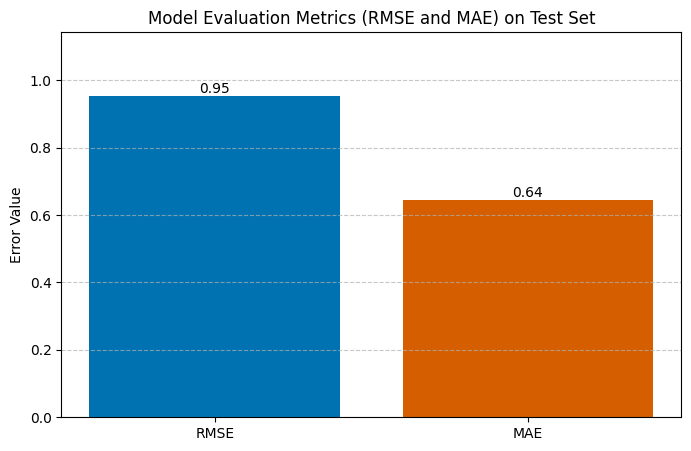

Model Evaluation Metrics (RMSE and MAE):


,Metric,Value
0,RMSE,0.951912
1,MAE,0.643776


In [20]:
# Assuming test_rmse and test_mae are already calculated
# Example values (replace with your actual values)
test_rmse = mean_squared_error(test_true_ratings, test_predicted_ratings, squared=False)
test_mae = mean_absolute_error(test_true_ratings, test_predicted_ratings)

# Create a DataFrame for the metrics
metrics_data = {
    "Metric": ["RMSE", "MAE"],
    "Value": [test_rmse, test_mae]
}
metrics_df = pd.DataFrame(metrics_data)

# Visualize RMSE and MAE with improved colorblind-friendly palette
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_df["Metric"], metrics_df["Value"], color=['#0072B2', '#D55E00']) # Qualitative colorblind-safe palette
plt.title("Model Evaluation Metrics (RMSE and MAE) on Test Set")
plt.ylabel("Error Value")

# Set y-axis limit dynamically
plt.ylim(0, max(metrics_df["Value"]) * 1.2)

# Add value labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Add a horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Display the DataFrame as a table
print("Model Evaluation Metrics (RMSE and MAE):")
metrics_df

Pada kode ini, dilakukan evaluasi terhadap model KNN dengan menghitung dua metrik kesalahan, yaitu **RMSE** (Root Mean Squared Error) dan **MAE** (Mean Absolute Error), untuk mengukur performa prediksi pada test set. RMSE dihitung untuk memberikan gambaran seberapa besar kesalahan rata-rata prediksi model dalam satuan aslinya, sedangkan MAE mengukur rata-rata perbedaan absolut antara nilai prediksi dan nilai sebenarnya. Hasil evaluasi ini kemudian disimpan dalam sebuah DataFrame yang mencatat nama metrik dan nilainya. Untuk memberikan gambaran visual yang lebih jelas, hasil RMSE dan MAE divisualisasikan dalam bentuk diagram batang menggunakan `matplotlib`, dengan nilai metrik yang ditampilkan di atas setiap batang untuk memudahkan perbandingan. Selain itu, DataFrame yang berisi nilai-nilai metrik juga ditampilkan untuk memberikan informasi yang lebih terstruktur. Dengan pendekatan ini, kita dapat dengan mudah menilai performa model berdasarkan kedua metrik kesalahan tersebut.

### 17. Evaluation Metrics: Precision@K, Recall@K, and Mean Average Precision (MAP)@K

In [21]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

# Function untuk menghitung metrik evaluasi
def precision_at_k(actual, predicted, k):
    """
    Menghitung Precision@K.
    """
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / k

def recall_at_k(actual, predicted, k):
    """
    Menghitung Recall@K.
    """
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / len(actual_set) if len(actual_set) > 0 else 0

def average_precision_at_k(actual, predicted, k):
    """
    Menghitung Mean Average Precision (MAP)@K.
    """
    score, hits = 0.0, 0
    for i, p in enumerate(predicted[:k]):
        if p in actual:
            hits += 1
            score += hits / (i + 1.0)
    return score / min(len(actual), k) if len(actual) > 0 else 0.0


Pada kode ini, tiga fungsi utama digunakan untuk menghitung metrik evaluasi dalam konteks rekomendasi berbasis peringkat, dengan fokus pada **Precision@K**, **Recall@K**, dan **Mean Average Precision (MAP)@K**.

1. **Precision@K**: Mengukur berapa banyak item yang relevan (sesuai dengan preferensi pengguna) yang ada dalam K rekomendasi teratas. Fungsi `precision_at_k` menerima dua parameter: `actual` (item yang relevan menurut ground truth) dan `predicted` (rekomendasi model). Precision dihitung sebagai rasio jumlah item relevan yang terdaftar di dalam `predicted[:k]` terhadap K.

2. **Recall@K**: Mengukur seberapa banyak item relevan yang berhasil ditemukan dalam K rekomendasi teratas dari seluruh item relevan yang tersedia. Fungsi `recall_at_k` menghitung recall dengan membandingkan jumlah item relevan yang ada di dalam K rekomendasi dengan jumlah total item relevan dalam data aktual.

3. **Mean Average Precision (MAP)@K**: Menghitung rata-rata dari Precision yang dihitung untuk setiap posisi item relevan dalam rekomendasi. Fungsi `average_precision_at_k` menghitung MAP dengan menjumlahkan nilai Precision setiap kali item relevan ditemukan di dalam rekomendasi, kemudian membaginya dengan jumlah relevan yang tersedia.

Ketiga metrik ini sangat berguna untuk menilai kualitas model rekomendasi, karena mereka mempertimbangkan baik relevansi (Precision) maupun kelengkapan (Recall) rekomendasi yang diberikan.

In [22]:
# Evaluasi Precision, Recall, MAP untuk semua user
def evaluate_recommendations(user_profiles, tfidf_matrix, test_data, best_knn_model, train_data, top_k_values=[10]):
    """
    Evaluasi Precision@K, Recall@K, dan MAP@K untuk semua pengguna dalam test_data.
    """
    results = {k: {"precision": [], "recall": [], "map": []} for k in top_k_values}

    for user_id in test_data['ReviewerId'].unique():
        # Ambil ground truth dan rekomendasi untuk user_id
        actual_places = test_data[test_data['ReviewerId'] == user_id]['PlaceID'].tolist()
        recommended_items = recommend_items(user_profiles, tfidf_matrix, user_id, best_knn_model, train_data, max(top_k_values))
        recommended_places = [item[0] for item in recommended_items]

        # Evaluasi untuk setiap nilai K
        for k in top_k_values:
            precision = precision_at_k(actual_places, recommended_places, k)
            recall = recall_at_k(actual_places, recommended_places, k)
            map_score = average_precision_at_k(actual_places, recommended_places, k)

            results[k]["precision"].append(precision)
            results[k]["recall"].append(recall)
            results[k]["map"].append(map_score)

    # Hitung rata-rata untuk setiap K
    summary_results = {}
    for k in top_k_values:
        summary_results[f"Precision@{k}"] = np.mean(results[k]["precision"])
        summary_results[f"Recall@{k}"] = np.mean(results[k]["recall"])
        summary_results[f"MAP@{k}"] = np.mean(results[k]["map"])

    return summary_results

Fungsi `evaluate_recommendations` di atas dirancang untuk mengevaluasi kinerja sistem rekomendasi berdasarkan tiga metrik penting: **Precision@K**, **Recall@K**, dan **Mean Average Precision (MAP)@K**. Fungsi ini bekerja dengan menghitung nilai-nilai evaluasi tersebut untuk setiap pengguna dalam dataset uji (`test_data`).

Berikut adalah langkah-langkah utama yang dilakukan dalam fungsi ini:

1. **Inisialisasi Struktur Hasil**: Fungsi ini memulai dengan menyiapkan sebuah struktur dictionary `results` untuk menyimpan nilai Precision, Recall, dan MAP untuk setiap nilai `K` yang diberikan dalam `top_k_values`.

2. **Proses Evaluasi per Pengguna**: Untuk setiap pengguna (`user_id`) yang terdapat pada dataset uji (`test_data`), fungsi ini mengambil **ground truth** atau daftar tempat yang benar-benar telah dinilai oleh pengguna (`actual_places`). Kemudian, rekomendasi item (tempat) diambil dengan memanggil fungsi `recommend_items`, yang mengembalikan K rekomendasi teratas berdasarkan profil pengguna yang dibangun sebelumnya.

3. **Menghitung Metrik untuk Setiap K**: Untuk setiap nilai K yang diberikan, fungsi ini menghitung Precision, Recall, dan MAP menggunakan fungsi-fungsi yang telah didefinisikan sebelumnya (yakni `precision_at_k`, `recall_at_k`, dan `average_precision_at_k`). Hasil-hasil ini kemudian ditambahkan ke dalam dictionary `results`.

4. **Ringkasan Hasil**: Setelah evaluasi untuk semua pengguna selesai, fungsi ini menghitung nilai rata-rata dari Precision, Recall, dan MAP untuk setiap nilai K yang ada, dan mengembalikannya dalam bentuk dictionary `summary_results`.

Fungsi ini memberikan gambaran menyeluruh mengenai kinerja sistem rekomendasi untuk setiap nilai K, serta memudahkan analisis efektivitas rekomendasi berdasarkan metrik yang relevan.

### 18. Generating User Profiles and Evaluating Recommendation Metrics for Top-5 and Top-10

In [23]:
user_profiles = build_user_profiles(data=train_data, tfidf_matrix=tfidf_matrix_train)

metrics = evaluate_recommendations(
    user_profiles=user_profiles,
    tfidf_matrix=tfidf_matrix_train,
    test_data=test_data,
    best_knn_model=best_knn_model,
    train_data=train_data,
    top_k_values=[5, 10]  # Evaluasi untuk Top-5 dan Top-10
)


Pada kode di atas, dua langkah utama dilakukan untuk mengevaluasi kinerja sistem rekomendasi:

1. **Membangun Profil Pengguna**:
   - Fungsi `build_user_profiles` dipanggil dengan data pelatihan (`train_data`) dan matriks TF-IDF (`tfidf_matrix_train`) untuk membangun profil pengguna berdasarkan rata-rata vektor TF-IDF dari item (tempat wisata) yang telah mereka beri rating.
   - Profil pengguna ini akan digunakan untuk membandingkan preferensi masing-masing pengguna terhadap item-item yang ada dalam sistem rekomendasi.

2. **Evaluasi Sistem Rekomendasi**:
   - Fungsi `evaluate_recommendations` dipanggil dengan berbagai parameter:
     - `user_profiles`: Profil pengguna yang telah dibangun sebelumnya.
     - `tfidf_matrix`: Matriks TF-IDF untuk data pelatihan.
     - `test_data`: Data uji yang berisi feedback atau rating pengguna terhadap item.
     - `best_knn_model`: Model KNN terbaik yang diperoleh dari GridSearchCV, digunakan untuk menemukan rekomendasi berdasarkan kedekatan antara profil pengguna dan item.
     - `train_data`: Data pelatihan yang berisi informasi mengenai item (tempat wisata) dan rating yang diberikan oleh pengguna.
     - `top_k_values=[5, 10]`: Menentukan bahwa evaluasi dilakukan untuk Top-5 dan Top-10 rekomendasi.

   Fungsi ini akan mengembalikan hasil evaluasi berupa metrik **Precision@K**, **Recall@K**, dan **MAP@K** untuk setiap nilai K yang ditentukan. Ini memberikan gambaran tentang seberapa efektif sistem rekomendasi dalam memberikan rekomendasi yang relevan untuk pengguna berdasarkan data uji.

### 19. Evaluation Results for Precision, Recall, and MAP at Top-5 and Top-10

In [24]:
# Evaluasi dan tampilkan hasil untuk Top-5 dan Top-10
print(f"Average Precision at 5: {metrics['Precision@5']:.17f}")
print(f"Average Recall at 5: {metrics['Recall@5']:.17f}")
print(f"Mean Average Precision at 5: {metrics['MAP@5']:.17f}")

print(f"Average Precision at 10: {metrics['Precision@10']:.17f}")
print(f"Average Recall at 10: {metrics['Recall@10']:.17f}")
print(f"Mean Average Precision at 10: {metrics['MAP@10']:.17f}")


Average Precision at 5: 0.03494728621632175
Average Recall at 5: 0.14091500715866198
Mean Average Precision at 5: 0.07539844461798777
Average Precision at 10: 0.02994923857868021
Average Recall at 10: 0.24129463317280575
Mean Average Precision at 10: 0.08889018788130462


Pada bagian kode ini, Anda menampilkan hasil evaluasi dari model rekomendasi yang dihitung sebelumnya menggunakan metrik Precision@K, Recall@K, dan Mean Average Precision (MAP)@K untuk nilai K = 5 dan K = 10.

Precision@K menunjukkan proporsi item yang relevan di antara K rekomendasi teratas yang diberikan kepada pengguna.
Recall@K mengukur proporsi item relevan yang berhasil ditemukan dalam K rekomendasi teratas dibandingkan dengan total item relevan yang tersedia untuk pengguna.
MAP@K adalah rata-rata dari precision pada setiap posisi dalam daftar rekomendasi, memberikan gambaran tentang kualitas posisi rekomendasi tersebut.
Kode ini akan mencetak hasil evaluasi untuk kedua nilai K (5 dan 10) dengan format yang lebih presisi, hingga 17 angka desimal.

Hasil evaluasi menunjukkan bahwa model rekomendasi memiliki **Average Precision@5** sebesar **0.0349** dan **Average Recall@5** sebesar **0.1409**, sementara **Mean Average Precision@5 (MAP@5)** tercatat sebesar **0.0754**. Untuk **Top-10**, nilai **Average Precision@10** adalah **0.0299**, **Average Recall@10** adalah **0.2413**, dan **MAP@10** adalah **0.0889**.

Nilai-nilai ini menunjukkan bahwa model memiliki tingkat presisi yang relatif rendah, yang berarti hanya sebagian kecil dari rekomendasi yang benar-benar relevan dengan preferensi pengguna. Namun, nilai **Recall@10** yang lebih tinggi menunjukkan bahwa model mampu menemukan lebih banyak item relevan jika lebih banyak rekomendasi (10 item) dipertimbangkan. **MAP@K** yang lebih rendah menunjukkan bahwa meskipun model menemukan beberapa item yang relevan, posisi mereka dalam daftar rekomendasi mungkin tidak optimal.

### 20. Visualization of Evaluation Metrics for Top-5 and Top-10 Recommendations

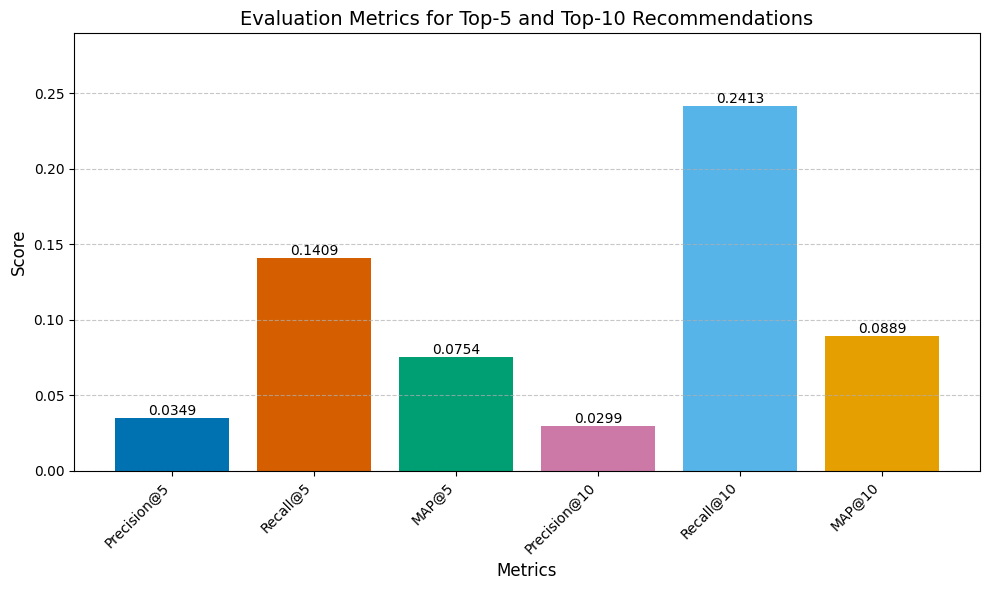

In [27]:
# Data evaluasi
precision_at_5 = metrics['Precision@5']
recall_at_5 = metrics['Recall@5']
map_at_5 = metrics['MAP@5']

precision_at_10 = metrics['Precision@10']
recall_at_10 = metrics['Recall@10']
map_at_10 = metrics['MAP@10']

metrics_names = ['Precision@5', 'Recall@5', 'MAP@5', 'Precision@10', 'Recall@10', 'MAP@10']
metrics_values = [precision_at_5, recall_at_5, map_at_5, precision_at_10, recall_at_10, map_at_10]

# Warna yang ramah untuk orang buta warna
colors = ['#0072B2', '#D55E00', '#009E73', '#CC79A7', '#56B4E9', '#E69F00']

# Membuat diagram batang
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_names, metrics_values, color=colors)

# Menambahkan nilai di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Memberikan judul dan label
plt.title('Evaluation Metrics for Top-5 and Top-10 Recommendations', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.ylim(0, max(metrics_values) * 1.2)  # Menyesuaikan skala y-axis
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotasi label sumbu x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Menyesuaikan tata letak agar label tidak tumpang tindih
plt.show()

Kode di atas digunakan untuk memvisualisasikan hasil evaluasi model rekomendasi dengan membuat diagram batang yang menggambarkan kinerja model berdasarkan tiga metrik utama: **Precision@K**, **Recall@K**, dan **MAP@K** untuk **Top-5** dan **Top-10** rekomendasi. Data evaluasi, yang mencakup nilai-nilai metrik tersebut, dipersiapkan terlebih dahulu dalam dua daftar, yaitu nama metrik dan nilainya. Selanjutnya, diagram batang dibuat dengan menggunakan `plt.bar`, di mana setiap batang mewakili satu metrik, dengan warna yang berbeda untuk membedakan metrik-metrik tersebut. Nilai masing-masing metrik ditampilkan di atas batang untuk mempermudah pembacaan hasil. Diagram ini kemudian dilengkapi dengan judul dan label pada sumbu Y, dengan skala sumbu Y disesuaikan antara 0 dan 1 untuk memudahkan perbandingan antar metrik. Visualisasi ini memberikan gambaran yang jelas mengenai kinerja model dalam memberikan rekomendasi pada dua tingkat Top-5 dan Top-10, memungkinkan untuk analisis lebih lanjut dan potensi perbaikan model.